In [222]:
# Import necessary lib
import numpy as np
from pandas import read_csv
import pandas as pd
import random
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from scipy import stats
import seaborn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score,accuracy_score,f1_score,roc_auc_score
from keras.regularizers import l1, l2
from keras.layers import Bidirectional
from keras.layers import Dense, SimpleRNN, concatenate, Input
from keras.layers.recurrent import GRU
from keras.layers import Dropout 
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Masking
import tensorflow as tf
import keras

In [223]:
# Global variables
num_features_in_each_time_step = 8
time_steps = 0
demographic_features = 5

In [224]:
# Train data
file1_train = 'ADNI_Time_Points_1_Train.csv'
file2_train = 'ADNI_Time_Points_2_Train.csv'
file3_train = 'ADNI_Time_Points_3_Train.csv'
file4_train = 'ADNI_Time_Points_4_Train.csv'
file5_train = 'ADNI_Time_Points_5_Train.csv'
file6_train = 'ADNI_Time_Points_6_Train.csv'
file7_train = 'ADNI_Time_Points_7_Train.csv'
file8_train = 'ADNI_Time_Points_8_Train.csv'
file9_train = 'ADNI_Time_Points_9_Train.csv'
file10_train = 'ADNI_Time_Points_10_Train.csv'
file11_train = 'ADNI_Time_Points_11_Train.csv'
file12_train = 'ADNI_Time_Points_12_Train.csv'
file13_train = 'ADNI_Time_Points_13_Train.csv'
file14_train = 'ADNI_Time_Points_14_Train.csv'
file15_train = 'ADNI_Time_Points_15_Train.csv'
file16_train = 'ADNI_Time_Points_16_Train.csv'
file17_train = 'ADNI_Time_Points_17_Train.csv'
file18_train = 'ADNI_Time_Points_18_Train.csv'
file19_train = 'ADNI_Time_Points_19_Train.csv'
file20_train = 'ADNI_Time_Points_20_Train.csv'
file21_train = 'ADNI_Time_Points_21_Train.csv'

In [225]:
# Test data
file1_test = 'ADNI_Time_Points_1_Test.csv'
file2_test = 'ADNI_Time_Points_2_Test.csv'
file3_test = 'ADNI_Time_Points_3_Test.csv'
file4_test = 'ADNI_Time_Points_4_Test.csv'
file5_test = 'ADNI_Time_Points_5_Test.csv'
file6_test = 'ADNI_Time_Points_6_Test.csv'
file7_test = 'ADNI_Time_Points_7_Test.csv'
file8_test = 'ADNI_Time_Points_8_Test.csv'
file9_test = 'ADNI_Time_Points_9_Test.csv'
file10_test = 'ADNI_Time_Points_10_Test.csv'
file11_test = 'ADNI_Time_Points_11_Test.csv'
file12_test = 'ADNI_Time_Points_12_Test.csv'
file13_test = 'ADNI_Time_Points_13_Test.csv'
file14_test = 'ADNI_Time_Points_14_Test.csv'
file15_test = 'ADNI_Time_Points_15_Test.csv'
file16_test = 'ADNI_Time_Points_16_Test.csv'
file17_test = 'ADNI_Time_Points_17_Test.csv'
file18_test = 'ADNI_Time_Points_18_Test.csv'
file19_test = 'ADNI_Time_Points_19_Test.csv'
file20_test = 'ADNI_Time_Points_20_Test.csv'
file21_test = 'ADNI_Time_Points_21_Test.csv'

In [226]:
# Train dfs
df1_train = read_csv(file1_train,header=0)
df2_train = read_csv(file2_train,header=0)
df3_train = read_csv(file3_train,header=0)
df4_train = read_csv(file4_train,header=0)
df5_train = read_csv(file5_train,header=0)
df6_train = read_csv(file6_train,header=0)
df7_train = read_csv(file7_train,header=0)
df8_train = read_csv(file8_train,header=0)
df9_train = read_csv(file9_train,header=0)
df10_train = read_csv(file10_train,header=0)
df11_train = read_csv(file11_train,header=0)
df12_train = read_csv(file12_train,header=0)
df13_train = read_csv(file13_train,header=0)
df14_train = read_csv(file14_train,header=0)
df15_train = read_csv(file15_train,header=0)
df16_train = read_csv(file16_train,header=0)
df17_train = read_csv(file17_train,header=0)
df18_train = read_csv(file18_train,header=0)
df19_train = read_csv(file19_train,header=0)
df20_train = read_csv(file20_train,header=0)
df21_train = read_csv(file21_train,header=0)

In [227]:
# Test dfs
df1_test = read_csv(file1_test,header=0)
df2_test = read_csv(file2_test,header=0)
df3_test = read_csv(file3_test,header=0)
df4_test = read_csv(file4_test,header=0)
df5_test = read_csv(file5_test,header=0)
df6_test = read_csv(file6_test,header=0)
df7_test = read_csv(file7_test,header=0)
df8_test = read_csv(file8_test,header=0)
df9_test = read_csv(file9_test,header=0)
df10_test = read_csv(file10_test,header=0)
df11_test = read_csv(file11_test,header=0)
df12_test = read_csv(file12_test,header=0)
df13_test = read_csv(file13_test,header=0)
df14_test = read_csv(file14_test,header=0)
df15_test = read_csv(file15_test,header=0)
df16_test = read_csv(file16_test,header=0)
df17_test = read_csv(file17_test,header=0)
df18_test = read_csv(file18_test,header=0)
df19_test = read_csv(file19_test,header=0)
df20_test = read_csv(file20_test,header=0)
df21_test = read_csv(file21_test,header=0)

In [228]:
dataset = []
target_1 = []

def create_train_lists(df, tp):
    
    num_feature_in_tp = num_features_in_each_time_step
    df1 = df[df.columns]
    if (df1.shape[1] -1) > ((tp + 1) * (num_feature_in_tp + 1)):
        df1 = df1.iloc[:,0:(tp + 1) * (num_feature_in_tp + 1)+1]
    
    Features = df1.loc[:, ~df1.columns.isin(['DX_0', 'DX_6', 'DX_12', 'DX_18', 'DX_24', 'DX_30', 'DX_36', 'DX_42', 'DX_48', 'DX_54', 'DX_60', 'DX_66', 'DX_72', 'DX_78', 'DX_84', 'DX_90', 'DX_96', 'DX_102', 'DX_108', 'DX_114', 'DX_120'])]
    
    Labels = df1.loc[:, df1.columns.isin(['DX_0', 'DX_6', 'DX_12', 'DX_18', 'DX_24', 'DX_30', 'DX_36', 'DX_42', 'DX_48', 'DX_54', 'DX_60', 'DX_66', 'DX_72', 'DX_78', 'DX_84', 'DX_90', 'DX_96', 'DX_102', 'DX_108', 'DX_114', 'DX_120'])]
    
    time_point = int((Features.shape[1] - 1) / num_feature_in_tp)
    
    for i in range(len(df1)):
        dataset.append(list(Features.iloc[i,1:Features.shape[1]-num_feature_in_tp]))
        target_1.append(Labels.iloc[i,1:])

In [229]:
Testset = []
target_2 = []
target_2_prev = []

def create_test_lists(df, tp):
    
    num_feature_in_tp = num_features_in_each_time_step
    
    Features = df.loc[:, ~df.columns.isin(['DX_0', 'DX_6', 'DX_12', 'DX_18', 'DX_24', 'DX_30', 'DX_36', 'DX_42', 'DX_48', 'DX_54', 'DX_60', 'DX_66', 'DX_72', 'DX_78', 'DX_84', 'DX_90', 'DX_96', 'DX_102', 'DX_108', 'DX_114', 'DX_120'])]
    
    Labels = df.loc[:, df.columns.isin(['DX_0', 'DX_6', 'DX_12', 'DX_18', 'DX_24', 'DX_30', 'DX_36', 'DX_42', 'DX_48', 'DX_54', 'DX_60', 'DX_66', 'DX_72', 'DX_78', 'DX_84', 'DX_90', 'DX_96', 'DX_102', 'DX_108', 'DX_114', 'DX_120'])]
    
    time_point = int((Features.shape[1] - 1) / num_feature_in_tp)
    
    if time_point <= tp:
        print("less",time_point)
        return
    index = (time_point - tp)
    
    for i in range(len(df)):
        Testset.append(list(Features.iloc[i,1:tp*num_feature_in_tp+1]))
        target_2.append(Labels.iloc[i,1:(tp+1)])
        #target_2.append(Labels.iloc[i,(tp+1)])
        target_2_prev.append(Labels.iloc[i,tp])

In [230]:
def prepare_data():
    global time_steps
    #global num_features_in_each_time_step
    time_steps = input("Please enter time points:\n")
    time_steps = int(time_steps)
    
    #create_train_lists(df1_train,time_steps)
    create_train_lists(df2_train,time_steps)
    create_train_lists(df3_train,time_steps)
    create_train_lists(df4_train,time_steps)
    create_train_lists(df5_train,time_steps)
    create_train_lists(df6_train,time_steps)
    create_train_lists(df7_train,time_steps)
    create_train_lists(df8_train,time_steps)
    create_train_lists(df9_train,time_steps)
    create_train_lists(df10_train,time_steps)
    create_train_lists(df11_train,time_steps)
    create_train_lists(df12_train,time_steps)
    create_train_lists(df13_train,time_steps)
    create_train_lists(df14_train,time_steps)
    create_train_lists(df15_train,time_steps)
    create_train_lists(df16_train,time_steps)
    create_train_lists(df17_train,time_steps)
    create_train_lists(df18_train,time_steps)
    create_train_lists(df19_train,time_steps)
    create_train_lists(df20_train,time_steps)
    create_train_lists(df21_train,time_steps)
    
    padded1 = pad_sequences(dataset, padding='post',dtype='float', value=-1)
    #print(padded1.shape)

    num_samples = len(padded1)
    num_features = padded1.shape[1]
    #num_features_in_each_time_step = 12
    time_steps = int(num_features / num_features_in_each_time_step)

    # Input train data
    data = padded1
    # Output train data
    #########################Change Here for ML###############################
    padded_ = pad_sequences(target_1, padding='post',dtype='float', value=-1)
    target = padded_
    #target = np.array(target_1)


    # data and target are reshaped into the 3D format expected by LSTMs, namely [samples, timesteps, features].
    data = np.reshape(data, (num_samples, time_steps, num_features_in_each_time_step))
    target = np.reshape(target, (num_samples, time_steps, 1))
    print("Train Data: ", data.shape ,target.shape)
    ###########################################################################################

    create_test_lists(df2_test, time_steps)
    create_test_lists(df3_test, time_steps)
    create_test_lists(df4_test, time_steps)
    create_test_lists(df5_test, time_steps)
    create_test_lists(df6_test, time_steps)
    create_test_lists(df7_test, time_steps)
    create_test_lists(df8_test, time_steps)
    create_test_lists(df9_test, time_steps)
    create_test_lists(df10_test, time_steps)
    create_test_lists(df11_test, time_steps)
    create_test_lists(df12_test, time_steps)
    create_test_lists(df13_test, time_steps)
    create_test_lists(df14_test, time_steps)
    create_test_lists(df15_test, time_steps)
    create_test_lists(df16_test, time_steps)
    create_test_lists(df17_test, time_steps)
    create_test_lists(df18_test, time_steps)
    create_test_lists(df19_test, time_steps)
    create_test_lists(df20_test, time_steps)
    create_test_lists(df21_test, time_steps)

    padded2 = pad_sequences(Testset, padding='post',dtype='float', value=-1)
    #print(padded2.shape)

    T_num_samples = len(padded2)
    # Input test data
    Tdata = padded2
    # Output test data
    #Ttarget = padded2[:,num_features_in_each_time_step:num_features]
    Ttarget = np.array(target_2)

    # Test data and target are reshaped into the 3D format expected by LSTMs, namely [samples, timesteps, features].
    Tdata = np.reshape(Tdata, (T_num_samples, time_steps, num_features_in_each_time_step))
    #########################Change Here for ML###############################
    Ttarget = np.reshape(Ttarget, (T_num_samples, time_steps, 1))
    print("Test Data: ", Tdata.shape ,Ttarget.shape)
    return data, target, Tdata, Ttarget

In [231]:
data, target, Tdata, Ttarget = prepare_data()

Please enter time points:
4
Train Data:  (901, 4, 8) (901, 4, 1)
less 2
less 3
less 4
Test Data:  (281, 4, 8) (281, 4, 1)


In [232]:
X_train = data
y_train = target

X_test = Tdata
y_test = Ttarget

In [233]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)
print("time_steps ", time_steps)

X_train  (901, 4, 8)
y_train  (901, 4, 1)
X_test  (281, 4, 8)
y_test  (281, 4, 1)
time_steps  4


In [234]:
 # to panelize positive (converter) misclassification
def binary_cross_entropy(y, yhat):
    alpha = 0.7
    loss = -(tf.math.reduce_mean((alpha * y * tf.math.log(yhat + 1e-6)) + ((1.0- alpha) * (1 - y) * tf.math.log(1 - yhat + 1e-6)), axis=-1))
    
    return loss

In [235]:
# Create a BiGRU model
def create_BiGRU_model(drout, L2):
    batch_shape = (None, time_steps, num_features_in_each_time_step)
    model = Sequential()
    model.add(Masking(-1, batch_input_shape=batch_shape))
    model.add(Bidirectional(GRU(32, input_shape=(None, num_features_in_each_time_step), activity_regularizer=l2(L2), return_sequences=True)))# activation = 'relu'
    model.add(Dropout(drout))
    model.add(Bidirectional(GRU(16, activity_regularizer=l2(L2), return_sequences=True, name='my_intermediate_layer')))#activation = 'tanh'
    model.add(Dropout(drout))
    model.add(Dense(1,  activation='sigmoid'))
    
    model.compile(loss= binary_cross_entropy, optimizer='adam',metrics=['accuracy'])#mean_absolute_error binary_crossentropy
    return model

In [236]:
# Old without demographic
drout = 0.4
L2 = 0.001
epochs_ = 70
batch_size_ = 8

model = create_BiGRU_model(drout, L2)
history = model.fit(X_train, y_train, epochs=epochs_, batch_size = batch_size_, shuffle = True)


Epoch 1/70
113/113 [==============================] - 12s 3ms/step - loss: 0.1849 - accuracy: 0.8611
Epoch 2/70
113/113 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.9351
Epoch 3/70
113/113 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.9427
Epoch 4/70
113/113 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9404
Epoch 5/70
113/113 [==============================] - 0s 3ms/step - loss: 0.0650 - accuracy: 0.9565
Epoch 6/70
113/113 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9525
Epoch 7/70
113/113 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9559
Epoch 8/70
113/113 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.9510
Epoch 9/70
113/113 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9478
Epoch 10/70
113/113 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.956

In [237]:
#train
train_loss, train_acc = model.evaluate(X_train, y_train, batch_size = batch_size_) 
print(train_loss, train_acc)

113/113 [==============================] - 6s 783us/step - loss: 0.0347 - accuracy: 0.9727
0.034667156636714935 0.972697377204895


In [238]:
# fbeata_function method to calculate f2 score
def overall_fbeta_function(pred, actual):
    
    # reshape the output
    if len(pred.shape) > 2:
        pred = np.reshape(pred, (pred.shape[0], pred.shape[1]*pred.shape[2]))
        actual = np.reshape(actual, (actual.shape[0], actual.shape[1]*actual.shape[2]))
    
    y = []
    yhat = []
    
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            if pred[i,j] > 0.5:
                pred[i,j] = 1
            else:
                pred[i,j] = 0 
    
    for i in range(pred.shape[0]):
        COUNTER = 0
        while (COUNTER < actual.shape[1]):
            if actual[i,COUNTER] != -1:
                COUNTER+=1
            else:
                break
        for j in range(COUNTER):
            y.append(actual[i,j])
            yhat.append(pred[i,j])
    
    return fbeta_score(y, yhat, beta=2)

#train_pred = model.predict([X_train, demographic_train_data])
train_pred = model.predict(X_train)
overall_fbeta_function(train_pred, y_train)

0.9590400577408877

In [239]:
# to plot the performane of the model
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    #val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    #plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

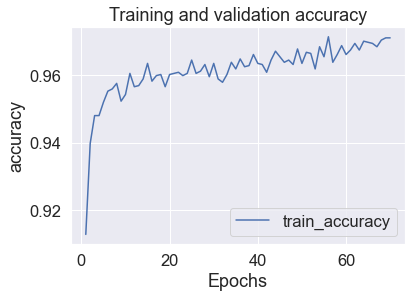

In [240]:
# to compare train accuracy and validation accuracy for overfitting verification
plot_metric(history, 'accuracy')

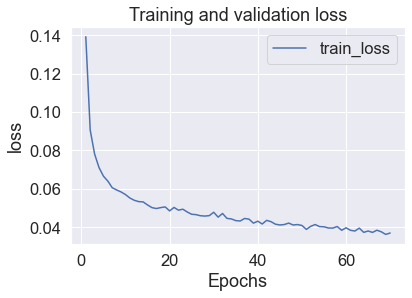

In [241]:
# to compare train loss and validation loss for overfitting verification
plot_metric(history, 'loss')

In [242]:
#test
score, acc = model.evaluate(X_test, y_test, batch_size = batch_size_) 
print(score, acc)
#score, acc = model.evaluate([X_test, demographic_test_data], y_test, batch_size = batch_size_) 
#print(score, acc)

36/36 [==============================] - 0s 826us/step - loss: 0.0848 - accuracy: 0.9546
0.08478855341672897 0.9546263217926025


In [243]:
pred = model.predict(X_test)
#pred = model.predict([X_test, demographic_test_data])
print('real shape=', y_test.shape, 'pred shape', pred.shape)

real shape= (281, 4, 1) pred shape (281, 4, 1)


In [244]:
# reshape the output
pred = np.reshape(pred, (pred.shape[0], pred.shape[1]*pred.shape[2]))
real = np.reshape(y_test, (y_test.shape[0], y_test.shape[1]*y_test.shape[2]))
#real = y_test
new_df = pd.DataFrame(pred)
new_df2 = pd.DataFrame(real)

In [245]:
'''
T = []
for i in range(1, time_steps):
    dx = num_features_in_each_time_step * i - 1
    T.append(dx)
T

prediction = new_df[T]
prediction = prediction.values
prediction
'''
prediction = new_df
prediction = prediction.values

In [246]:
for i in range(prediction.shape[0]):
    for j in range(prediction.shape[1]):
        if prediction[i,j] > 0.5:
            prediction[i,j] = 1
        else:
            prediction[i,j] = 0
        
ddddffff = pd.DataFrame(prediction)
ddddffff
'''
for i in range(len(prediction)):
    if prediction[i] > 0.5:
        prediction[i] = 1
    else:
        prediction[i] = 0
ddddffff = pd.DataFrame(prediction)
ddddffff
'''
prediction

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [247]:
'''
ground_T = new_df2[T]
ground_T = ground_T.values
ground_T
'''
ground_T = new_df2
ground_T = ground_T.values
ground_T

array([[0., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [248]:
second_index = prediction.shape[1]-1
correct_prediction_counter = 0
num_of_samples_converted_from_prev_to_next_time_point = 0
correct_converter_prediction = 0
for i in range(len(prediction)):
    #if int(target_2_prev[i]) == 0 and int(ground_T[i][second_index]) == 1:
    if int(ground_T[i][second_index-1]) == 0 and int(ground_T[i][second_index]) == 1:
        num_of_samples_converted_from_prev_to_next_time_point+=1
        if (prediction[i][second_index] == ground_T[i][second_index]):
            correct_converter_prediction += 1
    if (prediction[i][second_index] == ground_T[i][second_index]):
        correct_prediction_counter = correct_prediction_counter +1
    else:
        print("Real_next_time_point", int(ground_T[i][second_index]))
        print("Real_prev_time_point", int(ground_T[i][second_index-1]))
        print()
        print("Pred_next_time_point", int(prediction[i][second_index]))
        print("----------------------")
print("Number of true predictions =", correct_prediction_counter)
print("Number of all samples =", len(prediction))
print("Number of converted samples =", num_of_samples_converted_from_prev_to_next_time_point)
print("Number of true predictions for converters=", correct_converter_prediction)
print("Accuracy =", correct_prediction_counter/len(prediction))

Real_next_time_point 1
Real_prev_time_point 1

Pred_next_time_point 0
----------------------
Real_next_time_point 1
Real_prev_time_point 0

Pred_next_time_point 0
----------------------
Real_next_time_point 1
Real_prev_time_point 0

Pred_next_time_point 0
----------------------
Real_next_time_point 1
Real_prev_time_point 0

Pred_next_time_point 0
----------------------
Real_next_time_point 1
Real_prev_time_point 0

Pred_next_time_point 0
----------------------
Real_next_time_point 0
Real_prev_time_point 0

Pred_next_time_point 1
----------------------
Real_next_time_point 1
Real_prev_time_point 0

Pred_next_time_point 0
----------------------
Real_next_time_point 0
Real_prev_time_point 0

Pred_next_time_point 1
----------------------
Real_next_time_point 0
Real_prev_time_point 0

Pred_next_time_point 1
----------------------
Real_next_time_point 1
Real_prev_time_point 0

Pred_next_time_point 0
----------------------
Real_next_time_point 0
Real_prev_time_point 0

Pred_next_time_point 1


In [249]:
predicted_l = np.zeros((len(prediction)))
real_l = np.zeros((len(ground_T)))
dx = prediction.shape[1] - 1
for i in range(len(prediction)):
    predicted_l[i] = prediction[i,dx]
predicted_l
for i in range(len(ground_T)):
    real_l[i] = ground_T[i,dx]
real_l

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0.

In [250]:
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.5)
    ax = seaborn.heatmap(data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.show()
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()

CM = confusion_matrix(real_l, predicted_l, labels=[0,1])
CM

array([[161,   8],
       [ 21,  91]], dtype=int64)

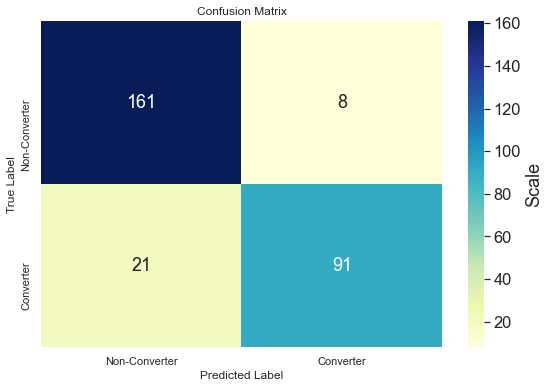

In [251]:
labels = ["Non-Converter", "Converter"]
plot_confusion_matrix(CM, labels, "confusion_matrix.png") 

In [252]:
sensitivity = CM[1,1] / (CM[1,1] + CM[1,0])
specificity = CM[0,0] / (CM[0,0] + CM[0,1])
print('sensitivity', sensitivity)
print('specificity', specificity)

sensitivity 0.8125
specificity 0.9526627218934911


In [253]:

#fbeta_score(y_test[:,3], pre, beta=0.5)
fbeta_score(ground_T[:, 3], prediction[:, 3], beta=2)

0.8318098720292505

In [254]:
f1_score(ground_T[:, 3], prediction[:, 3])

0.8625592417061612

In [255]:
accuracy_score(ground_T[:, 3], prediction[:, 3])

0.896797153024911

In [256]:
roc_auc_score(ground_T[:, 3], prediction[:, 3])

0.8825813609467456

In [257]:
prediction

f1=0
f2=0
f3=0
f4=0
f_list =[f1,f2,f3,f4]

t1=0
t2=0
t3=0
t4=0
t_list =[t1,t2,t3,t4]

for i in range(prediction.shape[0]):
    for j in range(prediction.shape[1]):
        if prediction[i][j] == ground_T[i][j]:
            t_list[j] +=1
        else:
            f_list[j] +=1
            
t_list

[279, 273, 269, 252]

In [258]:
f_list

[2, 8, 12, 29]

In [259]:
# To determine number of converter and nonconverters in train and test dataset
def label_counter(label):
    
    # reshape the output
    label = np.reshape(label, (label.shape[0], label.shape[1]*label.shape[2]))
    
    y = np.zeros(label.shape[0])
    
    for i in range(label.shape[0]):
        COUNTER = 0
        while (COUNTER < label.shape[1]):
            if label[i,COUNTER] != -1:
                COUNTER+=1
            else:
                break
        y[i] = label[i,COUNTER-1]
    
    converter = 0
    nonconverter = 0
    
    for i in range(len(y)):
        if y[i] == 1:
            converter +=1
        else:
            nonconverter +=1
    
    return nonconverter, converter

#non_converter_count , converter_count = label_counter(y_train)
non_converter_count , converter_count = label_counter(y_test)
print('Non converter = ', non_converter_count)
print('converter = ', converter_count)

Non converter =  169
converter =  112


In [260]:
# Table of results
metrics_results_df = pd.DataFrame(columns = ['Metrics', 'Bi-GRU without demographic'])

metrics_results_df.loc[len(metrics_results_df)] = ['Accuracy (Test)', round(accuracy_score(ground_T[:, 3], prediction[:, 3]), 3)]
metrics_results_df.loc[len(metrics_results_df)] = ['ROC_AUC (Test)', round(roc_auc_score(ground_T[:, 3], prediction[:, 3]), 3)]
metrics_results_df.loc[len(metrics_results_df)] = ['F-2 (Test)', round(fbeta_score(ground_T[:, 3], prediction[:, 3], beta=2), 3)] 
metrics_results_df.loc[len(metrics_results_df)] = ['Sensitivity (Test)', round(sensitivity, 3)] 
metrics_results_df.loc[len(metrics_results_df)] = ['Specificity (Test)', round(specificity, 3)]  
metrics_results_df.loc[len(metrics_results_df)] = ['Overall accuracy (Test)', round(acc, 3)]
metrics_results_df.loc[len(metrics_results_df)] = ['Overall accuracy (Train)', round(train_acc, 3)]
metrics_results_df.loc[len(metrics_results_df)] = ['Overall loss (Test)', round(score, 3)]
metrics_results_df.loc[len(metrics_results_df)] = ['Overall loss (Train)', round(train_loss, 3)]
metrics_results_df.loc[len(metrics_results_df)] = ['Overall F2 (Test)', round(overall_fbeta_function(prediction, ground_T), 3)]
metrics_results_df.loc[len(metrics_results_df)] = ['Overall F2 (Train)', round(overall_fbeta_function(train_pred, y_train), 3)]

In [261]:
metrics_results_df

,Metrics,Bi-GRU without demographic
0,Accuracy (Test),0.897
1,ROC_AUC (Test),0.883
2,F-2 (Test),0.832
3,Sensitivity (Test),0.812
4,Specificity (Test),0.953
5,Overall accuracy (Test),0.955
6,Overall accuracy (Train),0.973
7,Overall loss (Test),0.085
8,Overall loss (Train),0.035
9,Overall F2 (Test),0.902


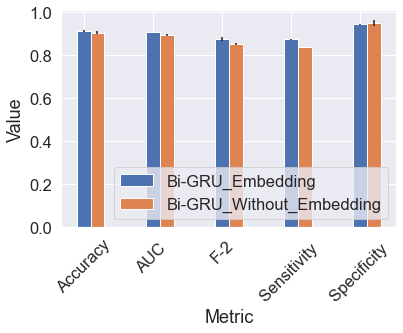

In [266]:
#Grouped Bar Plots
import numpy as np
Months = (['Accuracy','AUC ','F-2', 'Sensitivity ', 'Specificity '])
Proposed= [0.915, 0.910, 0.877, 0.874, 0.944] 
old= [0.906, 0.895, 0.854, 0.839, 0.950]

er1 = [0.005, 0.001, 0.008, 0.001, 0.004]
er2 = [0.008, 0.006, 0.004, 0.000, 0.013]
width = 0.2
x = np.arange(len(Months))
plt.bar(x, Proposed, width, label='Bi-GRU_Embedding', yerr=er1)
plt.bar(x+0.2, old, width, label='Bi-GRU_Without_Embedding', yerr=er2)

plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(x, Months, rotation=45)
plt.legend(loc ="lower right")
#plt.title('Grouped Bar chart for the vistors of waterpark')
plt.show()